# Forecast for LiteBIRD 
This is done using a Hamimeche&Lewis likelihood and COBAYA. The maximum multipole is fixed at $\ell_{max} =30$.\
We sampled the relevant reionisation parameters and As, while we fixed the other $\Lambda$CDM parameters to their fiducial value.\
Note that, for now, no prior is used on the amplitude of the scalar power spectrum $A_s.exp(-2\tau)$.

In [1]:
import MCtools
from getdist import plots, MCSamples
import reio
import warnings
warnings.filterwarnings("ignore")
DBdir = "/sps/planck/Users/tristram/Soft/LiteBIRD/Reio/chains"
MCtools.parname["reionization_width"] = "$\Delta z$"

## Table Of Content
* [Models](#Models)
* [Sky fraction](#Sky-fraction)
* [TANH](#TANH)
  * [Reionization optical depth](#Reionization-optical-depth)
  * [Reionization redshift](#Reionization-redshift)
  * [Reionization redshift + width](#Reionization-redshift-+-width)
* [Redshifts](#Redshifts)
  * [2pars, 3knots](#2pars,-3knots)
  * [3pars, 3knots](#3pars,-3knots)
* [Ionization fraction](#Ionization-fraction)
  * [4pars, 5knots](#4pars,-5knots)
* [Flexknots](#Flexknots)
  * [2pars, 1knot](#2pars,-1knot)
  * [4pars, 2knots](#4pars,-2knots)
  * [4pars, 3knots](#4pars,-3knots)

# Models

(1e-08, 0.01)

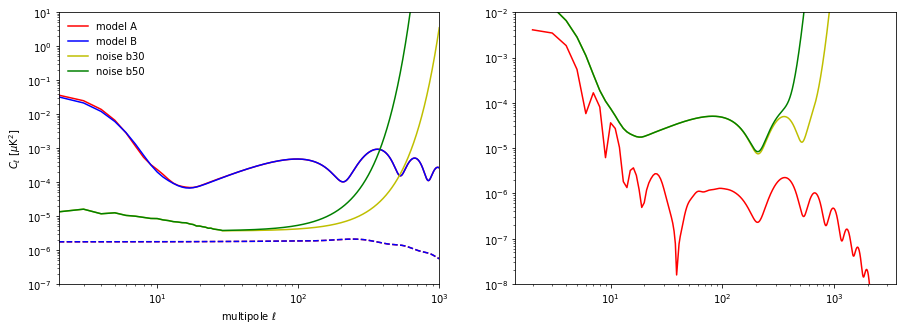

In [29]:
#noise
DATAdir = "/sps/planck/Users/tristram/Soft/LiteBIRD/Reio/modules/data/litebird"
modelA = np.loadtxt(f"{DATAdir}/model_A_cl_lensed.dat").T
modelB = np.loadtxt(f"{DATAdir}/model_B_cl_lensed.dat").T
noise30 = np.loadtxt( f"{DATAdir}/noise_litebird_only_b30.dat").T
noise50 = np.loadtxt( f"{DATAdir}/noise_litebird_only_b50.dat").T
c2d = modelA[0]*(modelA[0]+1)/2/pi
figure(figsize=(15,5))
subplot( 1, 2, 1)
plot( modelA[0], modelA[2]*(2.725e6)**2/c2d, 'r', label="model A")
plot( modelB[0], modelB[2]*(2.725e6)**2/c2d, 'b', label="model B")
plot( modelA[0], modelA[4]*(2.725e6)**2/c2d, 'r--')
plot( modelB[0], modelB[4]*(2.725e6)**2/c2d, 'b--')
plot( noise30[0], noise30[2], 'y', label="noise b30")
plot( noise50[0], noise50[2], 'g', label="noise b50")
xlim(2,1000)
ylim(1e-7,1e1)
loglog()
ylabel( "$C_\ell$ [$\mu$K$^2$]")
xlabel( "multipole $\ell$")
legend()
subplot( 1, 2, 2)
plot( modelA[0], abs(modelA[2]-modelB[2])*(2.725e6)**2/c2d, 'r', label="A-B")
plot( noise30[0], sqrt(2/(2*modelA[0][:1349]+1))*(modelA[2][:1349]*(2.725e6)**2/c2d[:1349]+noise30[2]), 'y', label="variance b30")
plot( noise50[0], sqrt(2/(2*modelA[0][:1349]+1))*(modelA[2][:1349]*(2.725e6)**2/c2d[:1349]+noise50[2]), 'g', label="variance b50")
loglog()
ylim(1e-8,1e-2)

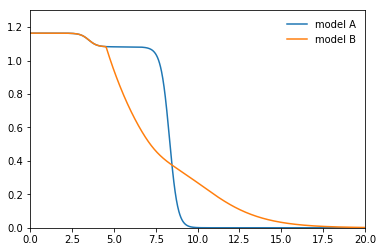

In [9]:
#reionization history
DATAdir = "/sps/planck/Users/tristram/Soft/LiteBIRD/Reio/software/reionization/LB_fiducials"
modelA = loadtxt( f"{DATAdir}/modelA/model_A_thermodynamics.dat").T
modelB = loadtxt( f"{DATAdir}/modelB/model_B_thermodynamics.dat").T
figure()
plot( modelA[1], modelA[3], label='model A')
plot( modelB[0], modelB[2], label='model B')
xlim(0,20)
ylim(0,1.3)
legend()

# Sky fraction

lb_reio_A_b30_f55: 6721  7281  6961  4241 
lb_reio_A_b30_f65: 7521  13521  10961  10481 
lb_reio_A_b30_f75: 12721  4161  8881  7601 
lb_reio_A_b30_f85: 6881  11681  8481  10081 
lb_reio_A_b30_f95: 11761  4961  7601  5601 
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

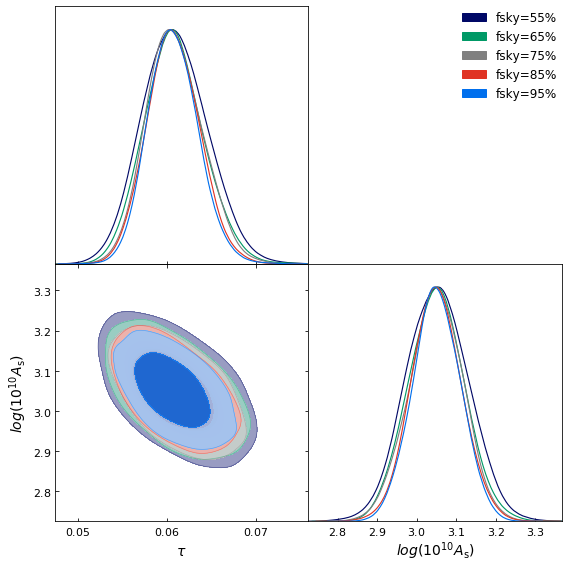

In [3]:
fsky = [55,65,75,85,95]
runnames = [f"lb_reio_A_b30_f{f}" for f in fsky]
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.8) for run in runnames]
listpar = ['tau','logA']
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = [f"fsky={f}%" for f in fsky],legend_loc = 'upper right')

In [4]:
for i,chain in enumerate(chains): 
    print( "fsky={}, tau={:.5f} +/- {:.5f}" .format(fsky[i], *MCtools.MaxPosterior(chain, 'tau', symmetrical=True)))

fsky=55, tau=0.06080 +/- 0.00367
fsky=65, tau=0.06072 +/- 0.00334
fsky=75, tau=0.06073 +/- 0.00315
fsky=85, tau=0.06069 +/- 0.00292
fsky=95, tau=0.06065 +/- 0.00277


# TANH

### Reionization optical depth

lb_reio_A_b30_f65: 7521  13521  10961  10481 
lb_reio_B_b30_f65: 14401  7601  7921  7521 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

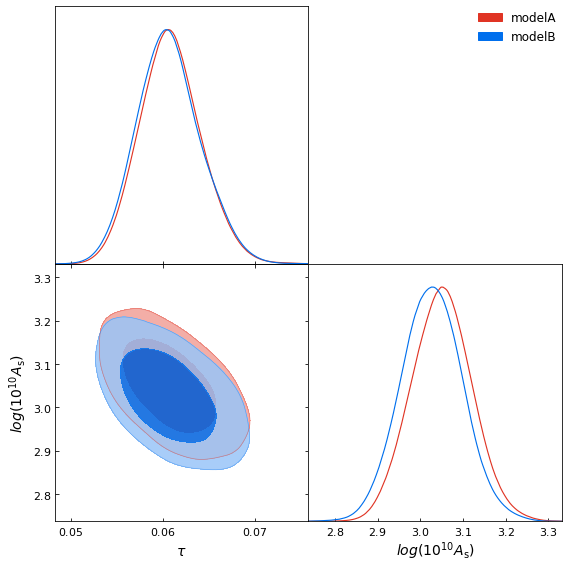

In [5]:
runnames = ["lb_reio_A_b30_f65","lb_reio_B_b30_f65"]
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.8) for run in runnames]
listpar = ['tau','logA']
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [6]:
MCtools.PrintMax( chains, 'tau')

tau             =  0.060715 +/- 0.003343  |   0.060517 +/- 0.003435


### Reionization redshift

lb_zreio_A_b30_f65: 6641  8001  5041  16401 
lb_zreio_B_b30_f65: 5041  13841  10081  12401 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

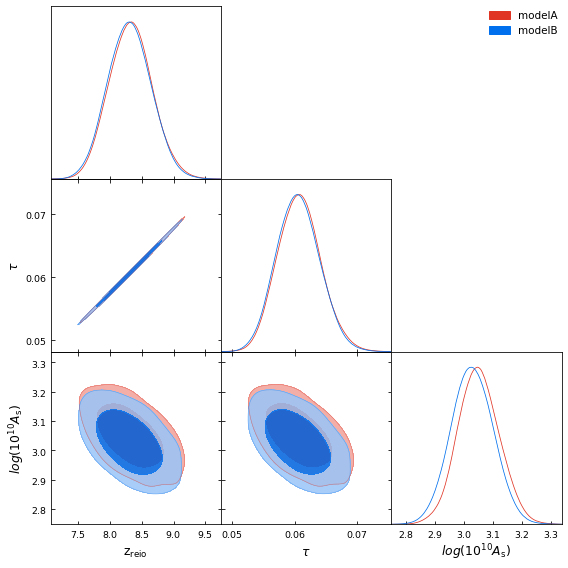

In [7]:
runnames = ["lb_zreio_A_b30_f65","lb_zreio_B_b30_f65"]
#runnames = ["lb_zreio_A_b30_f65_l300","lb_zreio_B_b30_f65_l300"]
listpar = ['z_reio','tau','logA']
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.8) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [8]:
for par in ['tau','z_reio','logA']: MCtools.PrintMax( chains, par)

tau             =  0.060628 +/- 0.003403  |   0.060438 +/- 0.003474
z_reio          =  8.319869 +/- 0.335337  |   8.301216 +/- 0.342649
logA            =  3.048314 +/- 0.071016  |   3.026612 +/- 0.072506


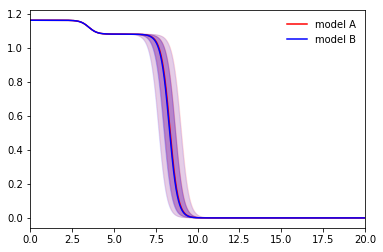

In [9]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], xe['xe2.5'], xe['xe97.5'], color=cols[ic], alpha=0.1)
    fill_between( xe['z'], xe['xe16'], xe['xe84'], color=cols[ic], alpha=0.2)
    plot( xe['z'], xe['xe50'], color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()

### Reionization redshift + width

lb_zdz_A_b30_f65: 8250  9133  8799  7971 
lb_zdz_B_b30_f65: 8636  7904  10215  9174 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

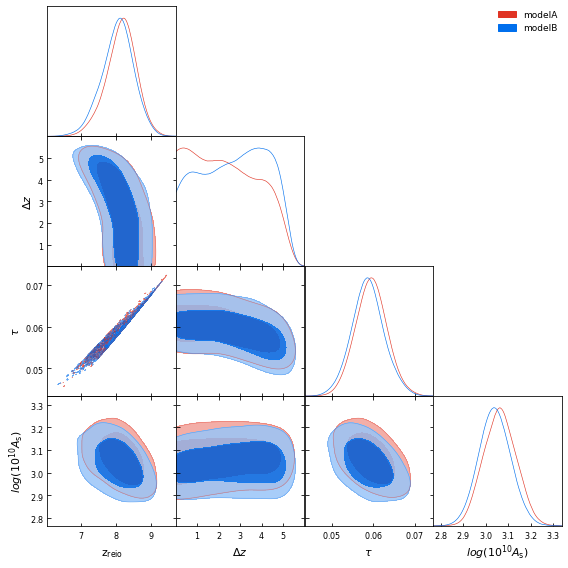

In [10]:
runnames = ["lb_zdz_A_b30_f65","lb_zdz_B_b30_f65"]
#runnames = ["lb_zdz_A_b30_f65_l300","lb_zdz_B_b30_f65_l300"]
listpar = ['z_reio','reionization_width','tau','logA']
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.8) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
support = {'reionization_width':[0,6]}
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [11]:
for par in ['tau','z_reio','reionization_width','logA']: MCtools.PrintMax( chains, par)

tau             =  0.059485 +/- 0.003826  |   0.058631 +/- 0.003819
z_reio          =  8.169128 +/- 0.423793  |   8.068566 +/- 0.451049
reionization_width =  2.306118 +/- 1.742118  |   2.859361 +/- 1.744313
logA            =  3.061711 +/- 0.074455  |   3.038842 +/- 0.070626


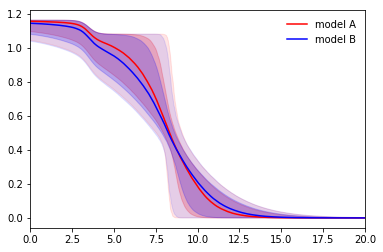

In [12]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], xe['xe2.5'], xe['xe97.5'], color=cols[ic], alpha=0.1)
    fill_between( xe['z'], xe['xe16'], xe['xe84'], color=cols[ic], alpha=0.2)
    plot( xe['z'], xe['xe50'], color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()

# Redshifts

### 2pars, 3knots
Setup (z2,z3): one fixed (z1=6,xe1=1) + one (z2,xe2=0.5) + one (z3,xe=0)

In [13]:
runnames = ["lb_3knots2z_A_b30_f65","lb_3knots2z_B_b30_f65"]
listpar = ['z2','z3','logA','tau']
support = {'z2':(6,20),'z3':(6,20)}

lb_3knots2z_A_b30_f65: 4359  3980  4574  6385 
lb_3knots2z_B_b30_f65: 5236  5365  4844  4639 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

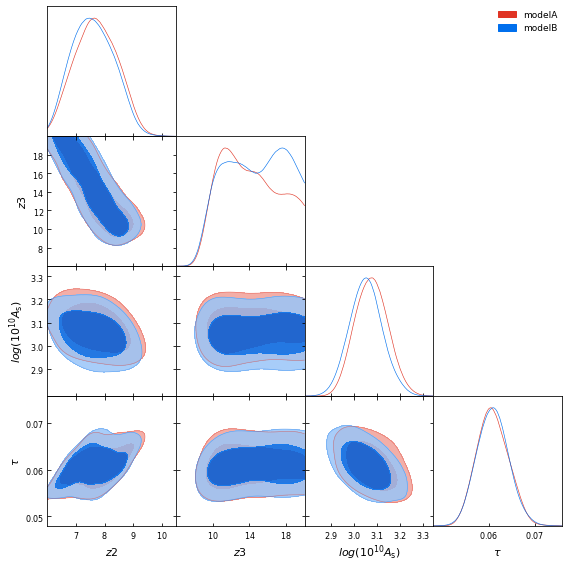

In [14]:
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.8) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [15]:
for par in ['tau','z2','z3']: MCtools.PrintMax( chains, par)

tau             =  0.060730 +/- 0.003574  |   0.060943 +/- 0.003391
z2              =  7.693486 +/- 0.785358  |   7.578757 +/- 0.786690
z3              =  13.722315 +/- 3.545053  |   14.550628 +/- 3.720934


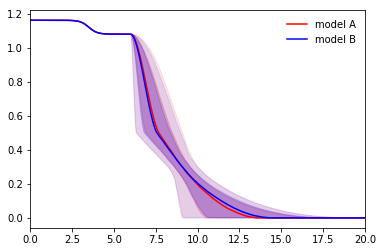

In [16]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], xe['xe2.5'], xe['xe97.5'], color=cols[ic], alpha=0.1)
    fill_between( xe['z'], xe['xe16'], xe['xe84'], color=cols[ic], alpha=0.2)
    plot( xe['z'], xe['xe50'], color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()

### 3pars, 3knots
Setup (z1,z2,z3): fit redshift for 3 knots with fixed xe= 1.0, 0.5, 0.0

In [17]:
runnames = ["lb_3knots3z_A_b30_f65","lb_3knots3z_B_b30_f65"]
listpar = ['z1','z2','z3','logA','tau']
support = {'z1':(6,20),'z2':(6,20),'z3':(6,20)}

lb_3knots3z_A_b30_f65: 2525  2766  2246  3487 
lb_3knots3z_B_b30_f65: 2814  3133  3259  3463 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

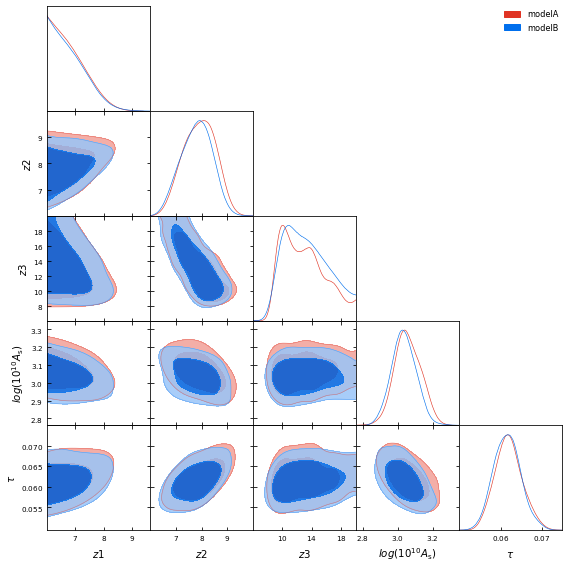

In [18]:
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.8) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [19]:
for par in ['tau','z1','z2','z3']: MCtools.PrintMax( chains, par)

tau             =  0.061764 +/- 0.003340  |   0.061480 +/- 0.003312
z1              =  6.749513 +/- 0.630904  |   6.719381 +/- 0.628127
z2              =  7.960909 +/- 0.660964  |   7.826594 +/- 0.628632
z3              =  12.549164 +/- 3.266552  |   12.943389 +/- 3.304003


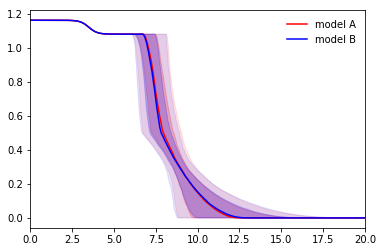

In [20]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], xe['xe2.5'], xe['xe97.5'], color=cols[ic], alpha=0.1)
    fill_between( xe['z'], xe['xe16'], xe['xe84'], color=cols[ic], alpha=0.2)
    plot( xe['z'], xe['xe50'], color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()

# Ionization fraction

### 4pars, 5knots
Setup (xe1,xe2,xe3,xe4): free xe for 4 knots with fixed redshifts at 7, 8, 9, 10 and one last knot (xe(20)=0)

In [21]:
runnames = ["lb_5knots_A_b30_f65","lb_5knots_B_b30_f65"]
listpar = ['xe1','xe2','xe3','xe4','logA','tau']
support = {p:(0,1) for p in listpar[:-2]}

lb_5knots_A_b30_f65: 111801  80201  92001  74201 
lb_5knots_B_b30_f65: 70601  82801  157252  106401 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

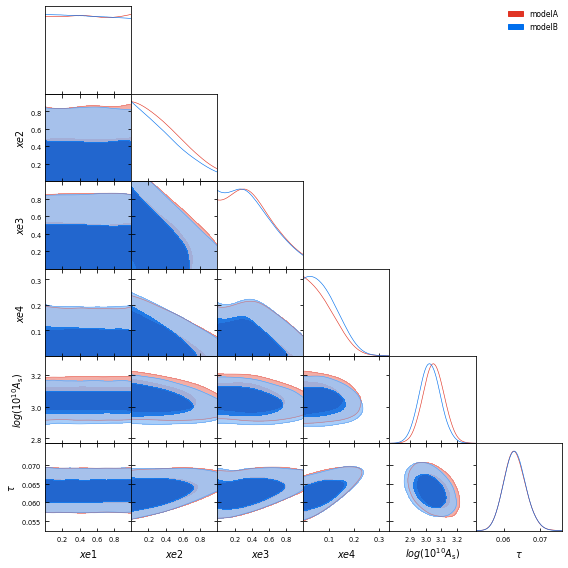

In [22]:
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.8) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [23]:
for par in ['tau','xe1','xe2','xe3','xe4']: MCtools.PrintMax( chains, par)

tau             =  0.062980 +/- 0.002989  |   0.063035 +/- 0.002984
xe1             =  0.498641 +/- 0.340868  |   0.494705 +/- 0.339890
xe2             =  0.331175 +/- 0.281084  |   0.303777 +/- 0.274885
xe3             =  0.368952 +/- 0.272708  |   0.353333 +/- 0.275055
xe4             =  0.069217 +/- 0.059595  |   0.076592 +/- 0.061536


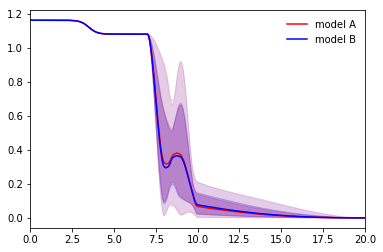

In [24]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], xe['xe2.5'], xe['xe97.5'], color=cols[ic], alpha=0.1)
    fill_between( xe['z'], xe['xe16'], xe['xe84'], color=cols[ic], alpha=0.2)
    plot( xe['z'], xe['xe50'], color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()

# Flexknots

### 2pars, 1knot
Setup (z2,xe2): one fixed knot (z1=6,xe1=1) + one free (z2,xe2) + one fixed (z3=20,xe3=0)

In [25]:
runnames = ["lb_1knot_A_b30_f65","lb_1knot_B_b30_f65"]
listpar = ['z2','xe2','logA','tau']
support = {'z2':(6,20),'xe2':(0,1)}

lb_1knot_A_b30_f65: 10801  41041  11881  22681 
lb_1knot_B_b30_f65: 28441  30961  54721  21721 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

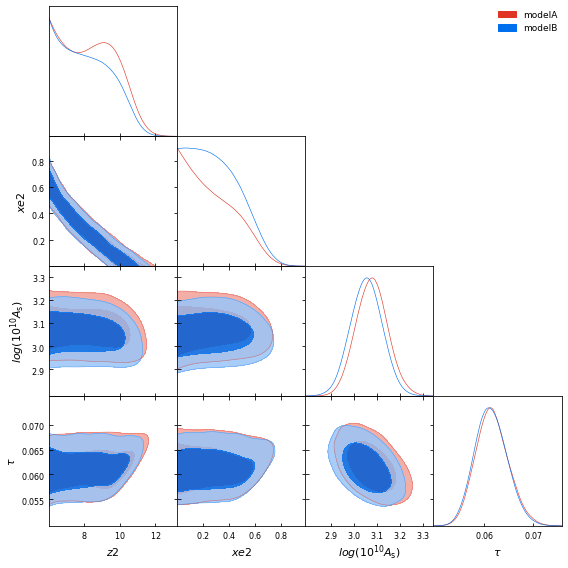

In [26]:
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.8) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [27]:
for par in ['tau','z2','xe2']: MCtools.PrintMax( chains, par)

tau             =  0.061487 +/- 0.003367  |   0.061270 +/- 0.003318
z2              =  8.355011 +/- 1.666790  |   8.018894 +/- 1.588571
xe2             =  0.244220 +/- 0.212018  |   0.276579 +/- 0.208041


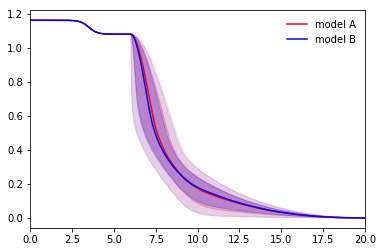

In [28]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], xe['xe2.5'], xe['xe97.5'], color=cols[ic], alpha=0.1)
    fill_between( xe['z'], xe['xe16'], xe['xe84'], color=cols[ic], alpha=0.2)
    plot( xe['z'], xe['xe50'], color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()

### 4pars, 2knots
Setup (z2, xe2, z3, xe3) : two free knots + two fixed nodes at beginning (xe(6)=1) and end (xe(20)=0)

In [29]:
runnames = ["lb_4knots_A_b30_f65","lb_4knots_B_b30_f65"]
listpar = ['z2','z3','xe2','xe3','logA','tau']
support = {'z2':(6,15),'z3':(6,20),'xe2':(0,1),'xe3':(0,1)}

lb_4knots_A_b30_f65: 9543  7607  8424  8133 
lb_4knots_B_b30_f65: 9032  8592  9631  8321 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

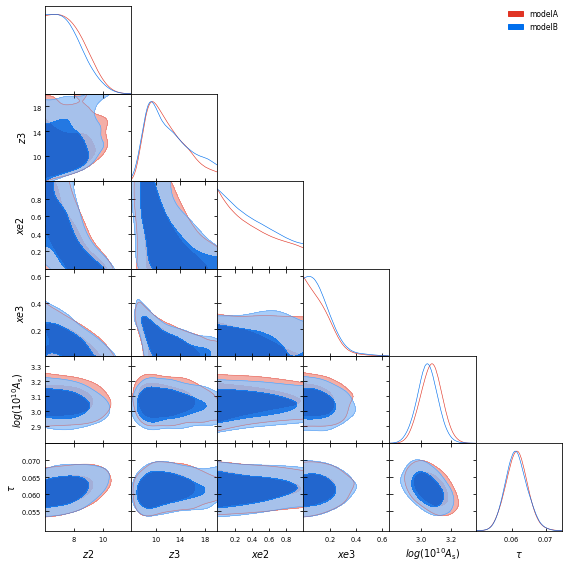

In [30]:
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.8) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [31]:
for par in ['tau','z2','z3','xe2','xe3']: MCtools.PrintMax( chains, par)

tau             =  0.061519 +/- 0.003112  |   0.061294 +/- 0.003207
z2              =  7.624353 +/- 1.190303  |   7.462561 +/- 1.102844
z3              =  11.141844 +/- 3.233742  |   11.357689 +/- 3.656342
xe2             =  0.352282 +/- 0.324576  |   0.365500 +/- 0.315136
xe3             =  0.109955 +/- 0.094373  |   0.113301 +/- 0.093671


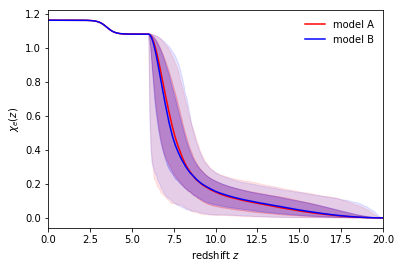

In [32]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], xe['xe2.5'], xe['xe97.5'], color=cols[ic], alpha=0.1)
    fill_between( xe['z'], xe['xe16'], xe['xe84'], color=cols[ic], alpha=0.2)
    plot( xe['z'], xe['xe50'], color=cols[ic], label='model A' if ic == 0 else 'model B')
ylabel('$\chi_e(z)$')
xlabel('redshift $z$')
xlim(0,20)
legend()

### 4pars, 3knots
Setup (z1,z2,xe2,z3): fit redshift for the first (z1,xe1=1) + one free knot (z2,xe2) + one last (z3,xe3=0)

In [33]:
runnames = ["lb_3knots_A_b30_f65","lb_3knots_B_b30_f65"]
listpar = ['z1','z2','z3','xe2','logA','tau']
support = {'z1':(6,20),'z2':(6,20),'z3':(6,20),'xe2':(0,1)}

lb_3knots_A_b30_f65: 2843  4053  4218  3291 
lb_3knots_B_b30_f65: 4238  3060  3246  2907 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

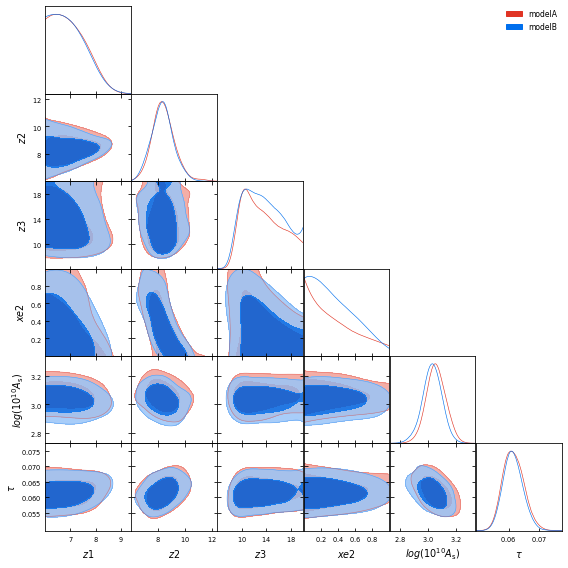

In [34]:
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.8) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [35]:
for par in ['tau','z1','z2','z3','xe2']: MCtools.PrintMax( chains, par)

tau             =  0.061354 +/- 0.003342  |   0.061218 +/- 0.003151
z1              =  6.951114 +/- 0.729131  |   6.952217 +/- 0.690314
z2              =  8.344520 +/- 0.773611  |   8.315727 +/- 0.798649
z3              =  12.847971 +/- 3.546982  |   13.168170 +/- 3.578257
xe2             =  0.294976 +/- 0.301657  |   0.313574 +/- 0.273111


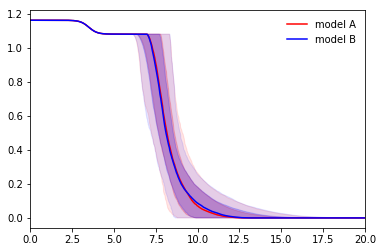

In [36]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], xe['xe2.5'], xe['xe97.5'], color=cols[ic], alpha=0.1)
    fill_between( xe['z'], xe['xe16'], xe['xe84'], color=cols[ic], alpha=0.2)
    plot( xe['z'], xe['xe50'], color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()